# ДЗ 6

### Задание 1
Написать бота который будет проверять доступность сайта

In [2]:
pip install pytelegrambotapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.14.0-py3-none-any.whl size=215252 sha256=bfafc00635e80dae9ea3507ce5d03f0c0a3bd02de7e2bcb7c9cf95c7287a52de
  Stored in directory: /root/.cache/pip/wheels/25/51/2d/24b40a366c85c37928d5aa36ddf257e5a79fad25e1ecd11b2c
Successfully built pytelegrambotapi


In [19]:
import telebot
from urllib.parse import urlparse
from telebot import types
import requests

bot = telebot.TeleBot('')

def check_site(url):
    parsed = urlparse(url,scheme='http')
    url = f'''{parsed.scheme}://{parsed.netloc if parsed.netloc!='' else 'www'}.{parsed.path}#{parsed.fragment}'''
    print(url)
    response = requests.get(url)
    if(response.status_code == 200):
        return True
    return False

@bot.message_handler(content_types = ["text"])
def handle_text(message):
    text:str = message.text
    if (text.startswith('/')):
        if (text.startswith('/start')):
            bot.send_message(message.from_user.id, text = 'Введите ссылку для проверки доступности сайта')
        else:
            bot.send_message(message.from_user.id, "Неизвестная команда")
    else:
        if(check_site(text)):
            bot.send_message(message.from_user.id, f'Сайт по ссылке: {text}  доступен')
        else:
            bot.send_message(message.from_user.id, f'Сайт по ссылке: {text}  недоступен')

@bot.message_handler(commands = ["start"])
def start(k, res = False):
    print(k)
    bot.send_message(k.chat.id, 'Привет')
bot.infinity_polling()

2023-12-12 11:57:56,831 (__init__.py:1083 MainThread) ERROR - TeleBot: "Threaded polling exception: A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running"
ERROR:TeleBot:Threaded polling exception: A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
2023-12-12 11:57:56,834 (__init__.py:1085 MainThread) ERROR - TeleBot: "Exception traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/telebot/__init__.py", line 1073, in __threaded_polling
    polling_thread.raise_exceptions()
  File "/usr/local/lib/python3.10/dist-packages/telebot/util.py", line 108, in raise_exceptions
    raise self.exception_info
  File "/usr/local/lib/python3.10/dist-packages/telebot/util.py", line 90, in run
    task(*args, **kwargs)
  

https://github.com./HerrEnot/MISIS_2023/blob/main/season_1/L7v2.ipynb#


2023-12-12 11:58:05,609 (__init__.py:1083 MainThread) ERROR - TeleBot: "Threaded polling exception: A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running"
ERROR:TeleBot:Threaded polling exception: A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
2023-12-12 11:58:05,612 (__init__.py:1085 MainThread) ERROR - TeleBot: "Exception traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/telebot/__init__.py", line 1073, in __threaded_polling
    polling_thread.raise_exceptions()
  File "/usr/local/lib/python3.10/dist-packages/telebot/util.py", line 108, in raise_exceptions
    raise self.exception_info
  File "/usr/local/lib/python3.10/dist-packages/telebot/util.py", line 90, in run
    task(*args, **kwargs)
  

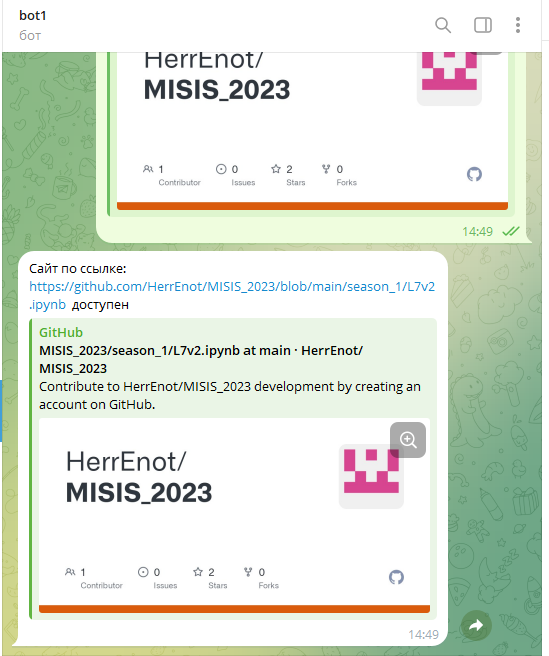



### Задание 2
Написать бота который будет анализировать текст - (Статистика, количество уникальных слов, самые популярные слова, кроме союзов и предлогов, количество предложений)

In [20]:
import telebot
bot = telebot.TeleBot('')

def create_stats(text):
    w = text.split()
    def replace_all(word,what):
        for l in what:
            word=word.replace(l,"")
        return word
    w = [replace_all(word.lower(),['.','!','?',',','-']) for word in w]
    c = dict()
    for word in w:
        c[word] = c[word]+1 if word in c else 1
    max_len = 0
    word_max_len = None
    for word,_ in c.items():
        if(len(word)>max_len):
            max_len = len(word)
            word_max_len = word
    max_cnt = 0
    word_max_cnt = None
    for word,cnt in c.items():
        if ( cnt > max_cnt ):
            word_max_cnt = word
            max_cnt = cnt
    return f"Самое длинное слово в тексте: {word_max_len}, чаще всего встречается в тексте: {word_max_cnt}"

@bot.message_handler(content_types=["text"])
def handle_text(message):
    text:str = message.text
    if (text.startswith('/')):
        if (text.startswith('/start')):
            bot.send_message(message.from_user.id, "Hello!")
        else:
            bot.send_message(message.from_user.id, "Неизвестная команда")
    else:
        stats = create_stats(text)
        bot.send_message(message.from_user.id, stats)
@bot.message_handler(commands=["start"])
def start(k, res = False):
    print(k)
    bot.send_message(k.chat.id, 'Hello!')
bot.infinity_polling()

2023-12-12 11:59:57,141 (__init__.py:966 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
ERROR:TeleBot:Infinity polling: polling exited
2023-12-12 11:59:57,145 (__init__.py:968 MainThread) ERROR - TeleBot: "Break infinity polling"
ERROR:TeleBot:Break infinity polling


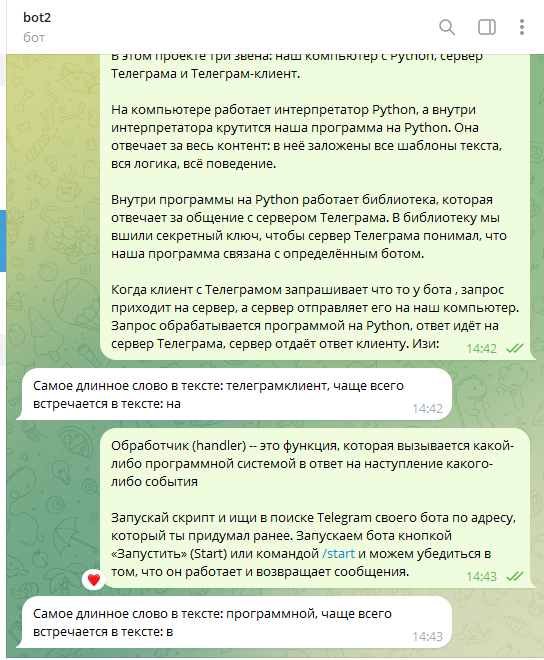